# SENG 474 - Project
## Data Science Job Salaries
### Chris Colomb (V00970873), Maika Rabenitas (V00970890)

#### Motivation
With the emergence of the AI boom, characterized by rapid advancements in artificial intelligence and machine learning technologies, the relevance and appeal of data science have grown. More individuals are recognizing the potential of data science as a career path, leading to a surge in interest within the field.

In the current job market, the demand for skilled data science professionals is evident across various industries and regions. As organizations increasingly rely on data-driven decision-making processes, the role of data scientists has become indispensable in extracting actionable insights from vast datasets. The intricacies of job salaries within the data science domain reflect a complex interplay of factors such as experience level, employment type, and geographic location.

Moreover, the advent of remote work and flexible arrangements has reshaped traditional notions of workplace dynamics, prompting a reevaluation of compensation models. Analyzing how remote work influences salary determinants offers valuable insights for both employers and employees navigating this evolving landscape.

Furthermore, disparities in compensation based on company size, job title, and employee residence underscore the multifaceted nature of salary determination in data science. Startups may offer competitive salaries to attract top talent, while larger corporations may provide additional perks and benefits. By examining these nuances, our project aims to provide a comprehensive understanding of salary dynamics within the data science industry.

Through data collection, preprocessing, visualization, and mining, our project seeks to uncover patterns and trends that shape salary structures. Ultimately, our endeavor is to contribute to greater transparency and equity in the job market, fostering an environment where both job seekers and employers can make informed decisions.

#### Data Structure Analysis and Visualization

The dataset has total of 12 features. The breakdown of the features is as follows:
- `id`: A unique identifier for each row
- `work_year`: The year the salary was paid
- `experience_level`: EN - Entry Level, MI - Mid Level, SE - Senior Level, EX - Executive Level/Director
- `employment_type`: FT - Full Time, CT - Contract, FL - Freelance
- `job_title`: The role workd in during the year
- `salary`: The total gross salary amount paid
- `salary_currency`: The currency of the salary paid as an ISO 4217 currency code
- `salary_in_usd`: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- `employment_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code
- `remote_ratio`: The overall amount of work done remotely, possible values are - as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- `company_location`: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- `company_size`: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [153]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
pd.set_option('display.max_columns', None)

ds_salary = pd.read_csv("ds_salaries.csv")
ds_salary.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [155]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are 607 instances in the dataset. We can see that each attribute has 607 non-null values, which means that there are no missing values in the dataset.

In [156]:
# Shows the summary of the numerical attributes
ds_salary.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [157]:
# replace the experience level with the full name for better understanding
ds_salary["experience_level"] = ds_salary["experience_level"].replace("EN", "Entry-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("MI", "Mid-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("SE", "Senior-Level")
ds_salary["experience_level"] = ds_salary["experience_level"].replace("EX", "Executive-Level")

# replace the employment type with the full name for better understanding
ds_salary["employment_type"] = ds_salary["employment_type"].replace("FT", "Full-Time")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("PT", "Part-Time")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("CT", "Contract")
ds_salary["employment_type"] = ds_salary["employment_type"].replace("FL", "Freelance")

### Numerical Features and their Histograms

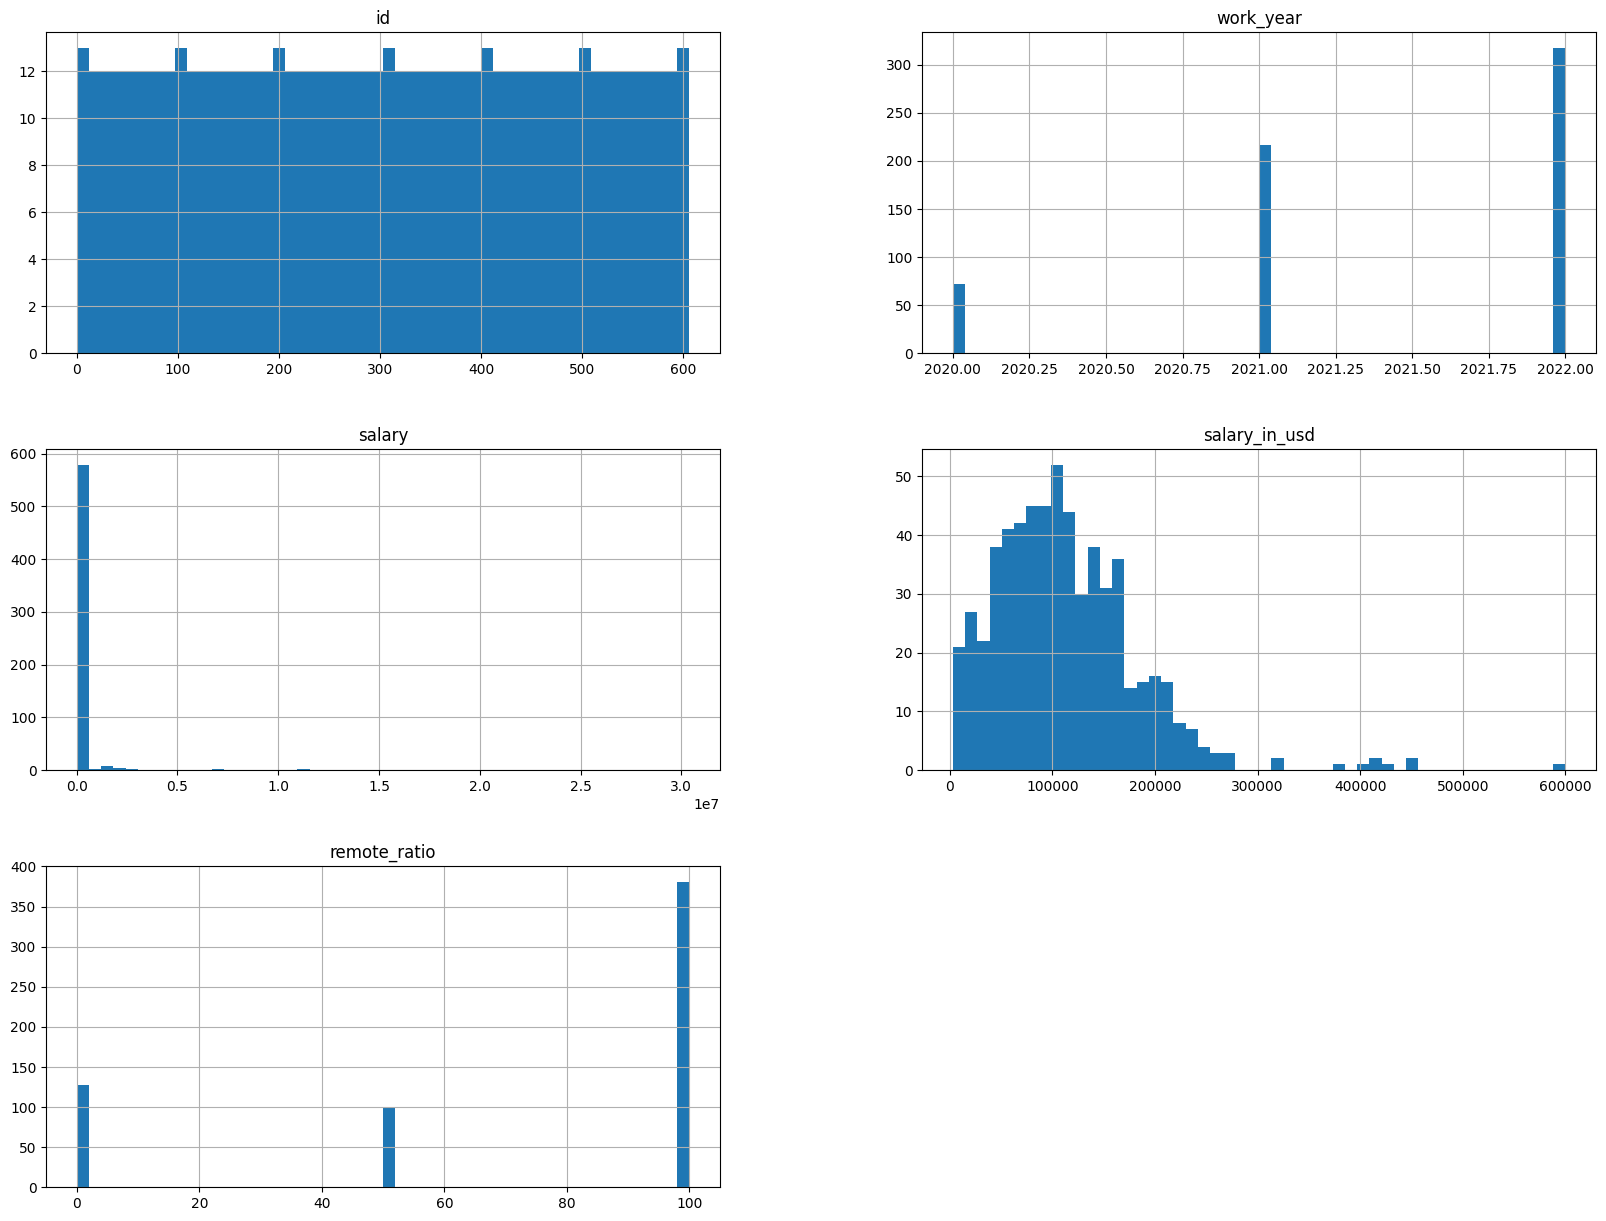

In [158]:
ds_salary.hist(bins=50,figsize=(20,15))
plt.show()

We will drop the `id` and `salary` columns as they are not useful for our analysis. The `salary` is not useful because the data has different currencies so it is not possible to compare the salaries directly. We will use the `salary_in_usd` column instead. The `id` column is not useful because it is just a unique identifier for each row.

In [159]:
# drop the id and salary columns
ds_salary = ds_salary.drop("id", axis=1)
ds_salary = ds_salary.drop("salary", axis=1)

ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,Senior-Level,Full-Time,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,Senior-Level,Full-Time,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,Mid-Level,Full-Time,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,USD,150000,US,50,US,L


### Categorical Features

In [160]:
# Explore categorical features
ds_salary["experience_level"].value_counts()

experience_level
Senior-Level       280
Mid-Level          213
Entry-Level         88
Executive-Level     26
Name: count, dtype: int64

In [161]:
ds_salary["employment_type"].value_counts()

employment_type
Full-Time    588
Part-Time     10
Contract       5
Freelance      4
Name: count, dtype: int64

In [162]:
ds_salary["job_title"].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [163]:
ds_salary["salary_currency"].value_counts()

salary_currency
USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: count, dtype: int64

In [164]:
ds_salary["employee_residence"].value_counts()

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: count, dtype: int64

In [165]:
ds_salary["company_location"].value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [166]:
ds_salary["company_size"].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

From the above, we can observe that out of 607 entries, there are 588 entries where the employees are working full-time and the remaining 19 entries are working part-time, contract, or freelance. So we can see that the majority of the employees are working full-time. Another thing we can observe is that not all employees are working in the same country as the location of their companies. For example, there are 355 employees working for companies in the US but only 332 employees are residing in the US. This means that there are 23 employees who are working for companies in the US but are residing in other countries. Also, we can see that the majority of the employees reside and work for the companies in the US. The country with the next highest number of employees is Great Britain which has 47 employees. 

#### Correlations in the Data

In [167]:
ds_salary.corr(numeric_only=True)

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


The above correlation matrix does not tell us much of anything, as work_year and remote_ratio have categorical variables. Instead we plot out salary_in_usd versus the other attributes to explore their relationships visually:

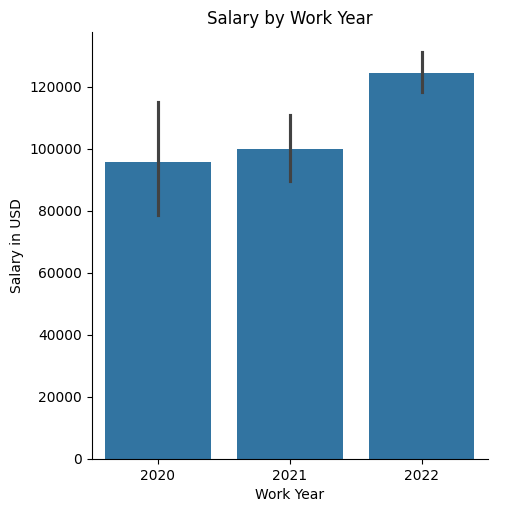

In [168]:
# Plot `salary_in_usd` vs `work_year`
sns.catplot(x="work_year", y="salary_in_usd", data=ds_salary, kind="bar")

plt.title("Salary by Work Year")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

plt.show()

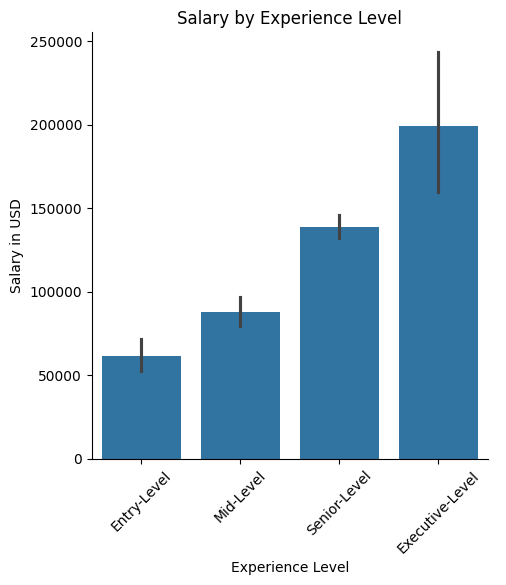

In [169]:
# Plot `salary_in_usd` vs `experience_level`
sns.catplot(x="experience_level", y="salary_in_usd", data=ds_salary, kind="bar", order=["Entry-Level", "Mid-Level", "Senior-Level", "Executive-Level"])

plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.xticks(rotation=45)
plt.ylabel("Salary in USD")

plt.show()

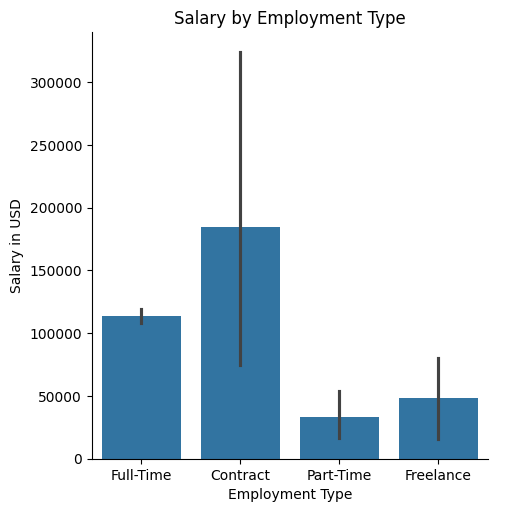

In [170]:
# Plot `salary_in_usd` vs `employment_type`
sns.catplot(x="employment_type", y="salary_in_usd", data=ds_salary, kind="bar")

plt.title("Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary in USD")

plt.show()

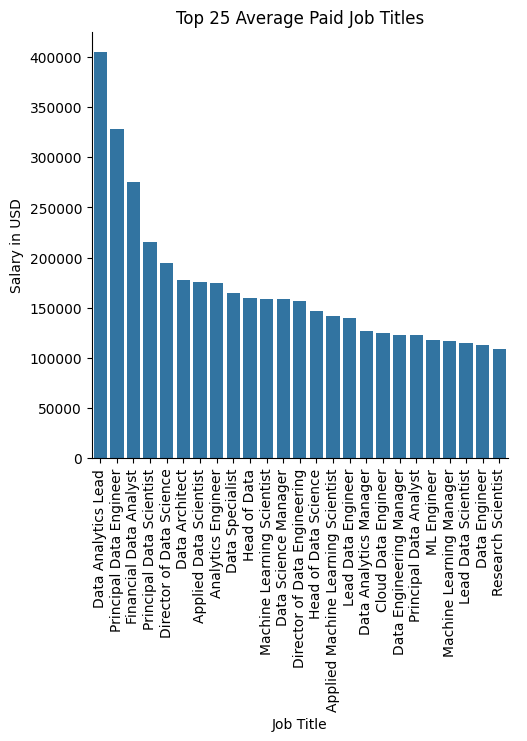

In [171]:
# Plot top 25 average paid `job_title` order by `salary_in_usd`
top_25_job_titles = ds_salary.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(25)
sns.catplot(x=top_25_job_titles.index, y=top_25_job_titles.values, kind="bar")

plt.title("Top 25 Average Paid Job Titles")
plt.xlabel("Job Title")
plt.xticks(rotation=90)
plt.ylabel("Salary in USD")

plt.show()

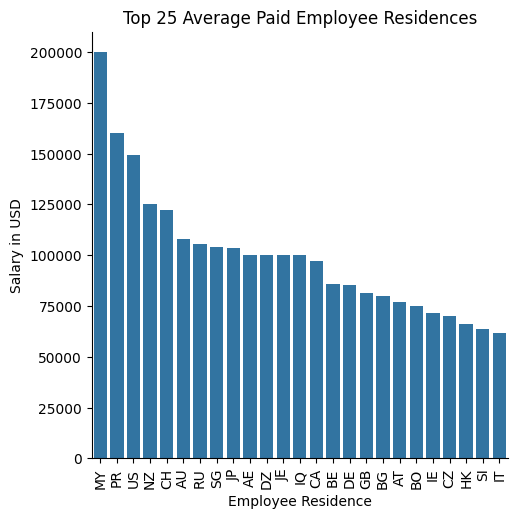

In [172]:
# Plot top 25 average paid `job_title` order by `salary_in_usd`
top_25_employee_residence = ds_salary.groupby("employee_residence")["salary_in_usd"].mean().sort_values(ascending=False).head(25)
sns.catplot(x=top_25_employee_residence.index, y=top_25_employee_residence.values, kind="bar")

plt.title("Top 25 Average Paid Employee Residences")
plt.xlabel("Employee Residence")
plt.xticks(rotation=90)
plt.ylabel("Salary in USD")

plt.show()

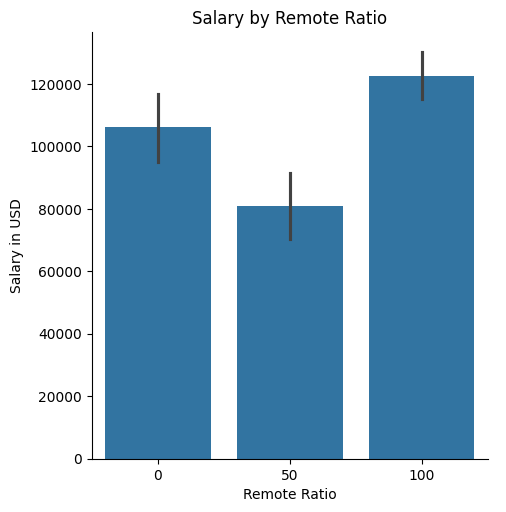

In [173]:
# Plot `salary_in_usd` vs `remote_ratio`
sns.catplot(x="remote_ratio", y="salary_in_usd", data=ds_salary, kind="bar")

plt.title("Salary by Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary in USD")

plt.show()

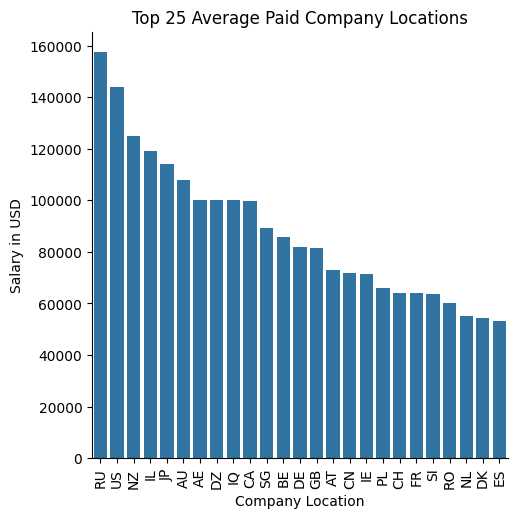

In [174]:
# Plot top 25 average paid `company_location` order by `salary_in_usd`
top_25_company_location = ds_salary.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(25)
sns.catplot(x=top_25_company_location.index, y=top_25_company_location.values, kind="bar")

plt.title("Top 25 Average Paid Company Locations")
plt.xlabel("Company Location")
plt.xticks(rotation=90)
plt.ylabel("Salary in USD")

plt.show()

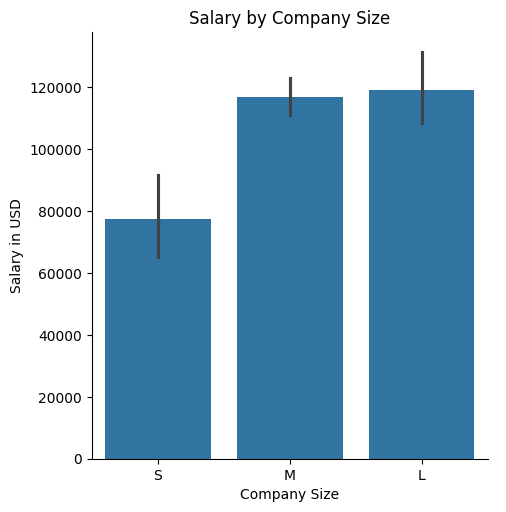

In [175]:
# Plot `salary_in_usd` vs `company_size`
sns.catplot(x="company_size", y="salary_in_usd", data=ds_salary, kind="bar", order=["S", "M", "L"])

plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")

plt.show()

### Feature Engineering
Various techniques were employed to transform and engineer features from the raw dataset in order to enhance the predictive performance of our models. 

### Encoding Categorical Variables

In [176]:
train_set, test_set = train_test_split(ds_salary, test_size=0.2, random_state=42)

len(train_set),len(test_set)

(485, 122)

In [177]:
# drop the target column(salary_in_usd) from the train_set and save the resulting dataset to a variable called "ds"
# create a copy of the target column(salary_in_usd) and save it to a variable called "ds_labels"
ds = train_set.drop("salary_in_usd", axis=1)
ds_labels = train_set["salary_in_usd"].copy()
ds_labels

9      125000
227     88654
591    144854
516    152500
132     38400
        ...  
71      42197
106    187442
270     72500
435     91614
102     36259
Name: salary_in_usd, Length: 485, dtype: int64

In [178]:
num_attribs = ["work_year", "remote_ratio"]
cat_attribs = ["job_title", "experience_level", "employment_type", "employee_residence", "company_location", "company_size"]

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', cat_pipeline, cat_attribs)])

ds_prepared = preprocessing.fit_transform(ds)

print(ds_prepared.shape)
print(preprocessing.get_feature_names_out())


(485, 151)
['num__work_year' 'num__remote_ratio' 'cat__job_title_AI Scientist'
 'cat__job_title_Analytics Engineer'
 'cat__job_title_Applied Data Scientist'
 'cat__job_title_Applied Machine Learning Scientist'
 'cat__job_title_BI Data Analyst' 'cat__job_title_Big Data Architect'
 'cat__job_title_Big Data Engineer' 'cat__job_title_Business Data Analyst'
 'cat__job_title_Cloud Data Engineer'
 'cat__job_title_Computer Vision Engineer'
 'cat__job_title_Computer Vision Software Engineer'
 'cat__job_title_Data Analyst' 'cat__job_title_Data Analytics Engineer'
 'cat__job_title_Data Analytics Lead'
 'cat__job_title_Data Analytics Manager' 'cat__job_title_Data Architect'
 'cat__job_title_Data Engineer' 'cat__job_title_Data Engineering Manager'
 'cat__job_title_Data Science Consultant'
 'cat__job_title_Data Science Engineer'
 'cat__job_title_Data Science Manager' 'cat__job_title_Data Scientist'
 'cat__job_title_Director of Data Engineering'
 'cat__job_title_Director of Data Science' 'cat__job_ti

### Train and Evaulate on the Training Set

In [179]:
# create a pipeline for preprocessing the data and fitting a linear regression model
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(ds, ds_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_title',
                                                   'experience_level',
                                                   'employment_type',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('linearregression', LinearRegression())])

In [180]:
salary_predictions = lin_reg.predict(ds)
salary_predictions

array([124993.29050948,  85643.12511084, 182355.86528774, 171726.79940041,
        38396.21282505,  93742.54500853, 154737.20532544, 154737.20532544,
       168925.74558314, 153673.42457513, 140378.55688187, 154737.20532544,
       105802.84531123, 147203.85862538, 154737.20532544,  73124.22175288,
        22850.20644846, 154737.20532544,  92804.770049  ,  25974.07596023,
        13399.78236412, 119232.96501582, 133138.92016676,  89062.63218619,
        40189.34298157, 137516.54167404,  84055.22805719, 180177.65365154,
        89424.08070029,  22568.30112845, 147203.85862538,  72705.63693739,
       147203.85862538, 119232.96501582,  81240.95404291,  86361.67393226,
       146284.91824376,  72005.35707661,  79995.24938092, 154737.20532544,
        66024.40968503,  24952.7165899 ,  32975.37242919, 154737.20532544,
       133773.73892078,  69987.14663144, 111166.41132286, 147203.85862538,
       144427.86076582, 234571.68683925,  47319.32415548, 161404.67835925,
       167378.92015713, 2

In [181]:
# linear regression model RMSE
warnings.filterwarnings("ignore")

lin_rmse = mean_squared_error(ds_labels, salary_predictions, squared=False)
print("RMSE: ", lin_rmse)

RMSE:  39274.37370980276


In [182]:
# mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(ds_labels, salary_predictions)
print("Mean absolute percentage: ", mape)

Mean absolute percentage:  32.528584668263704


In [183]:
# tree regression model RMSE
tree_rmses = -cross_val_score(lin_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=10)
print("tree_rmses: ", np.mean(tree_rmses))


tree_rmses:  65825.11248083241


### Learning Curves

In [184]:
# forest regression model RMSE
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(forest_rmses)

54457.50460472268

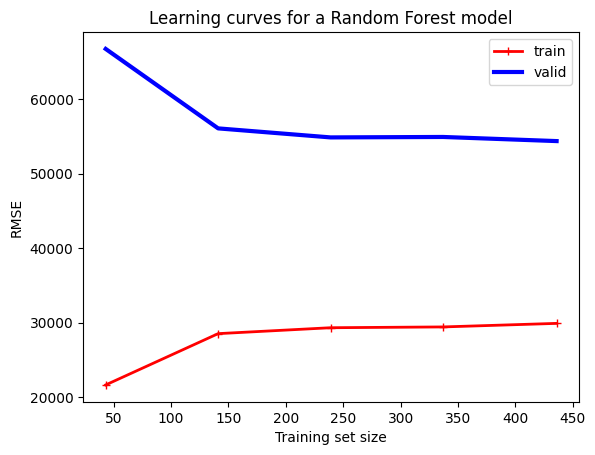

In [185]:
# learning curve for a Random Forest model
train_sizes, train_scores, test_scores = learning_curve(estimator=forest_reg, X=ds, y=ds_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a Random Forest model')
plt.legend()
plt.show()

In [186]:
# sgd regression model RMSE
sgd_reg = make_pipeline(preprocessing, SGDRegressor(max_iter=1000, tol=1e-3))
sgd_rmses = -cross_val_score(sgd_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(sgd_rmses)

53091.89698021377

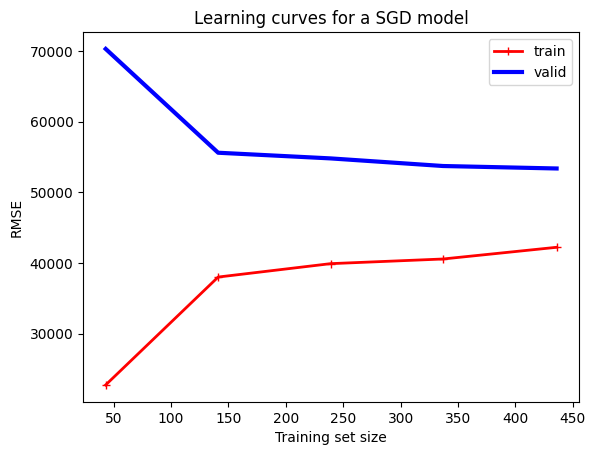

In [187]:
# learning curve for a SGD model
train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_reg, X=ds, y=ds_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a SGD model')
plt.legend()
plt.show()

In [188]:
# ridge regression model RMSE
ridge_reg = make_pipeline(preprocessing, Ridge(alpha=1.0))
ridge_rmses = -cross_val_score(ridge_reg, ds, ds_labels, scoring="neg_root_mean_squared_error", cv=10)
np.mean(ridge_rmses)

53951.56392467169

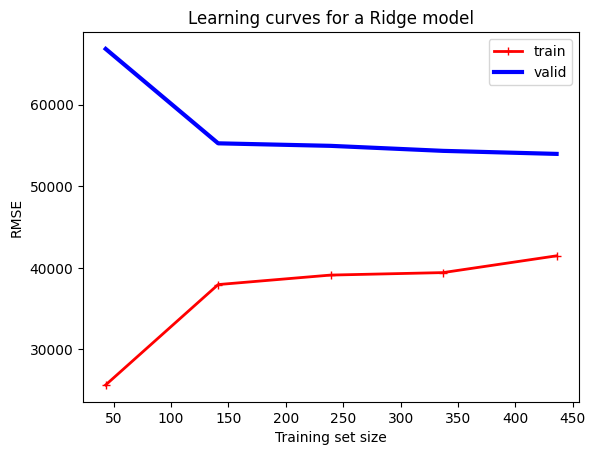

In [189]:
# Leartning curve for Ridge model
train_sizes, train_scores, test_scores = learning_curve(estimator=ridge_reg, X=ds, y=ds_labels, cv=10, scoring='neg_root_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a Ridge model')
plt.legend()
plt.show()

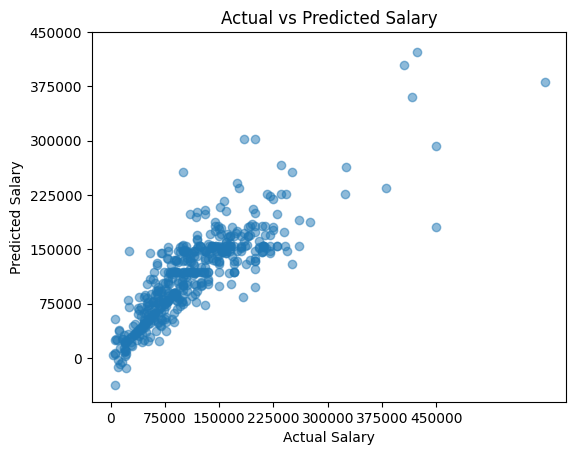

In [190]:
# scatter plot of actual vs predicted salary
plt.scatter(ds_labels, salary_predictions, alpha=0.5)
# x labels from 0 to 500000 in increments of 75000
plt.xticks(np.arange(0, 500000, step=75000))
# y labels from 0 to 500000 in increments of 75000
plt.yticks(np.arange(0, 500000, step=75000))

# make plot square dimensions
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [191]:
# Use the model to make predictions on new data
# Assuming `X_new` is your new data
# Define a single new sample
X_new = pd.DataFrame([{
    'work_year': 2024,
    'experience_level': 'Entry-Level',
    'employment_type': 'Full-Time',
    'job_title': 'Data Engineer',
    'employee_residence': 'US',
    'remote_ratio': 0,
    'company_location': 'US',
    'company_size': 'M'
}])

# Make predictions on the new sample
predictions = lin_reg.predict(X_new)
print(f"Predictions: {predictions}")

Predictions: [87647.55415959]


### Handling Outliers


In [192]:
# make a copy of ds_salary and save it to a variable called "ds_salary_bucket"
ds_salary_bucket = ds_salary.copy()
ds_salary_bucket.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,Senior-Level,Full-Time,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,Senior-Level,Full-Time,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,Mid-Level,Full-Time,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,USD,150000,US,50,US,L


In [193]:
# replace the all in a numeric form
ds_salary['experience_level'] = ds_salary['experience_level'].replace('Entry-Level', 1)
ds_salary['experience_level'] = ds_salary['experience_level'].replace('Mid-Level', 2)
ds_salary['experience_level'] = ds_salary['experience_level'].replace('Senior-Level', 3)
ds_salary['experience_level'] = ds_salary['experience_level'].replace('Executive-Level', 4)

ds_salary['employment_type'] = ds_salary['employment_type'].replace('Full-Time', 1)
ds_salary['employment_type'] = ds_salary['employment_type'].replace('Part-Time', 2)
ds_salary['employment_type'] = ds_salary['employment_type'].replace('Contract', 3)
ds_salary['employment_type'] = ds_salary['employment_type'].replace('Freelance', 4)

ds_salary['remote_ratio'] = ds_salary['remote_ratio'].replace(0, 1)
ds_salary['remote_ratio'] = ds_salary['remote_ratio'].replace(50, 2)
ds_salary['remote_ratio'] = ds_salary['remote_ratio'].replace(100, 3)

ds_salary['company_size'] = ds_salary['company_size'].replace('S', 1)
ds_salary['company_size'] = ds_salary['company_size'].replace('M', 2)
ds_salary['company_size'] = ds_salary['company_size'].replace('L', 3)

# bucket outliers
ds_salary["job_title"] = ds_salary["job_title"].apply(lambda x: x if ds_salary["job_title"].value_counts()[x] > 10 else "Other")
ds_salary["job_title"].value_counts()

job_title
Other                        155
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: count, dtype: int64

### Creating Additional Features

In [194]:
# New binary column for when employee_residence and company_location are the same
ds_salary['same_location'] = np.where(ds_salary['employee_residence'] == ds_salary['company_location'], 1, 0)
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,same_location
0,2020,2,1,Data Scientist,EUR,79833,DE,1,DE,3,1
1,2020,3,1,Other,USD,260000,JP,1,JP,1,1
2,2020,3,1,Other,GBP,109024,GB,2,GB,2,1
3,2020,2,1,Other,USD,20000,HN,1,HN,1,1
4,2020,3,1,Machine Learning Engineer,USD,150000,US,2,US,3,1


In [195]:
# create column for mean, min and max for each of the salarys grouped by cluster. Cluster is defined by the following columns: work_year, experience_level, employment_type, job_title, remote_ratio, company_size, same_location

# mean salary for cluster
ds_salary['mean_country_salary'] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'same_location'])['salary_in_usd'].transform('mean')

# min salary for cluster
ds_salary['min_country_salary'] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'same_location'])['salary_in_usd'].transform('min')

# max salary for cluster
ds_salary['max_country_salary'] = ds_salary.groupby(['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'same_location'])['salary_in_usd'].transform('max')

ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,same_location,mean_country_salary,min_country_salary,max_country_salary
0,2020,2,1,Data Scientist,EUR,79833,DE,1,DE,3,1,60157.0,40481,79833
1,2020,3,1,Other,USD,260000,JP,1,JP,1,1,260000.0,260000,260000
2,2020,3,1,Other,GBP,109024,GB,2,GB,2,1,109024.0,109024,109024
3,2020,2,1,Other,USD,20000,HN,1,HN,1,1,20000.0,20000,20000
4,2020,3,1,Machine Learning Engineer,USD,150000,US,2,US,3,1,150000.0,150000,150000


In [196]:
# drop the target column(salary_in_usd) from the train_set 
X = ds_salary.drop("salary_in_usd", axis=1)
y = ds_salary["salary_in_usd"]

cat_attribs = ["employee_residence", "company_location", "job_title", "salary_currency"]

X_dummies = pd.get_dummies(X, columns=cat_attribs)

X_dummies.head()

,work_year,experience_level,employment_type,remote_ratio,company_size,same_location,mean_country_salary,min_country_salary,max_country_salary,employee_residence_AE,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,company_location_AE,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Scientist,salary_currency_AUD,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,salary_currency_CLP,salary_currency_CNY,salary_currency_DKK,salary_currency_EUR,salary_currency_GBP,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD
0,2020,2,1,1,3,1,60157.0,40481,79833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2020,3,1,1,1,1,260000.0,260000,260000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

### Model Selection and Evaluation
We created models before and after feature engineering to determine the most suitable regression models for predicting job salaries.

#### After Feature Engineering
##### Data Preparation and Preprocessing
The dataset’s numeric features were scaled using `MinMaxScaler`, while categorical features were one-hot encoded.

##### Model Training and Evaluation
We trained the regression models `RandomForestRegressor`, `SGDRegressor`, `Ridge`, and `DecisionTreeRegressor`.

Each model’s performance was evaluated using mean squared error (MSE) and R-squared (R2) scores.

In [197]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_dummies)
y = np.log(y)

def ridge_regression(X, y):
    ridge = Ridge(random_state=42)
    ridge.fit(X, y)
    return ridge

def sgd_regression(X, y):
    sgd = SGDRegressor(random_state=42)
    sgd.fit(X, y)
    return sgd

def random_forest_regression(X, y):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)
    return rf

def decision_tree_regression(X, y):
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X, y)
    return dt


In [198]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = ridge_regression(X_train, y_train)
ridge_pred = ridge.predict(X_test)
sgd = sgd_regression(X_train, y_train)
sgd_pred = sgd.predict(X_test)
rf = random_forest_regression(X_train, y_train)
rf_pred = rf.predict(X_test)
dt = decision_tree_regression(X_train, y_train)
dt_pred = dt.predict(X_test)

In [199]:
# print("Linear Regression MSE: ", mean_squared_error(y_test, linear_pred))
# print("Ridge Regression MSE: ", mean_squared_error(y_test, ridge_pred)**0.5)
# print("SGD Regression MSE: ", mean_squared_error(y_test, sgd_pred)**0.5)
# print("Random Forest Regression MSE: ", mean_squared_error(y_test, rf_pred)**0.5)

print("Ridge Regression MSE: ", mean_squared_error(y_test, ridge_pred))
print("SGD Regression MSE: ", mean_squared_error(y_test, sgd_pred))
print("Random Forest Regression MSE: ", mean_squared_error(y_test, rf_pred))
print("Decision Tree Regression MSE: ", mean_squared_error(y_test, dt_pred))

Ridge Regression MSE:  0.19725377418055814
SGD Regression MSE:  0.4231541951213471
Random Forest Regression MSE:  0.12491690719113324
Decision Tree Regression MSE:  0.14350962674677212


In [200]:
# r scores

# print("Linear Regression R2: ", r2_score(y_test, linear_pred))
print("Ridge Regression R2: ", r2_score(y_test, ridge_pred))
print("SGD Regression R2: ", r2_score(y_test, sgd_pred))
print("Random Forest Regression R2: ", r2_score(y_test, rf_pred))
print("Decision Tree Regression R2: ", r2_score(y_test, dt_pred))

Ridge Regression R2:  0.7195537582301159
SGD Regression R2:  0.39837904646471056
Random Forest Regression R2:  0.8223989512960932
Decision Tree Regression R2:  0.7959646873874725


### Hyperparameter Tuning

In [201]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_grid_pred = rf_grid.predict(X_test)
print("Random Forest Regression GridSearchCV MSE: ", mean_squared_error(y_test, rf_grid_pred))
print("Random Forest Regression GridSearchCV R2: ", r2_score(y_test, rf_grid_pred))

Random Forest Regression GridSearchCV MSE:  0.12276541423007933
Random Forest Regression GridSearchCV R2:  0.8254578439212331


In [202]:
# plot the learning curve for rf_grid
# train_sizes, train_scores, test_scores = learning_curve(estimator=rf_grid, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')

# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, "r-+", linewidth=2, label="train")
# plt.plot(train_sizes, test_scores_mean, "b-", linewidth=3, label="valid")
# plt.ylabel('MSE')
# plt.xlabel('Training set size')
# plt.title('Learning curves for a Random Forest model')
# plt.legend()
# plt.show()

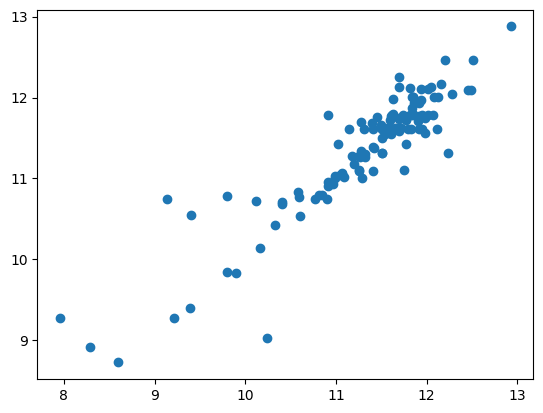

In [203]:
# plot actual vs predicted
plt.scatter(y_test, rf_grid_pred)

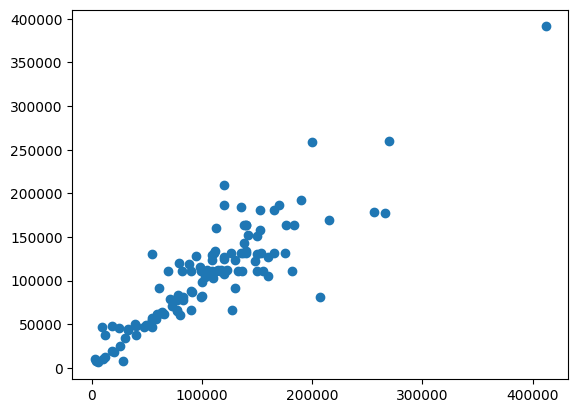

In [204]:
# remove log transformations on the target
y_test = np.exp(y_test)
rf_grid_pred = np.exp(rf_grid_pred)
plt.scatter(y_test, rf_grid_pred)

In [205]:
X_dummies.head()

,work_year,experience_level,employment_type,remote_ratio,company_size,same_location,mean_country_salary,min_country_salary,max_country_salary,employee_residence_AE,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,company_location_AE,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Scientist,salary_currency_AUD,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,salary_currency_CLP,salary_currency_CNY,salary_currency_DKK,salary_currency_EUR,salary_currency_GBP,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD
0,2020,2,1,1,3,1,60157.0,40481,79833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2020,3,1,1,1,1,260000.0,260000,260000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [206]:
def importance_ranking(data_set):
    # Get feature importances
    importances = rf_grid.best_estimator_.feature_importances_

    # Convert the importances into a DataFrame
    feature_importances = pd.DataFrame({
        'Feature': data_set.columns,
        'Importance': importances
    })

    # Sort the DataFrame by importance in ascending order
    feature_importances_asc = feature_importances.sort_values(by='Importance', ascending=True)

    # Sort the DataFrame by importance in descending order
    feature_importances_desc = feature_importances.sort_values(by='Importance', ascending=False)

    # Return both ascending and descending order DataFrames
    return feature_importances_asc, feature_importances_desc

    # Display the DataFrame
    # for i in range(0, len(feature_importances)):
    #     print(feature_importances.iloc[i]['Feature'], ":", feature_importances.iloc[i]['Importance'])
    # print(feature_importances)

importance_ranking(X_dummies)

(                   Feature  Importance
 128    salary_currency_CLP    0.000000
 40   employee_residence_JE    0.000000
 42   employee_residence_KE    0.000000
 44   employee_residence_MD    0.000000
 56   employee_residence_RO    0.000000
 ..                     ...         ...
 91     company_location_IN    0.020909
 64   employee_residence_US    0.044113
 8       max_country_salary    0.059271
 7       min_country_salary    0.091606
 6      mean_country_salary    0.695517
 
 [141 rows x 2 columns],
                    Feature  Importance
 6      mean_country_salary    0.695517
 7       min_country_salary    0.091606
 8       max_country_salary    0.059271
 64   employee_residence_US    0.044113
 91     company_location_IN    0.020909
 ..                     ...         ...
 115    company_location_VN    0.000000
 111    company_location_SI    0.000000
 74     company_location_CL    0.000000
 89     company_location_IE    0.000000
 60   employee_residence_SI    0.000000
 
 [141 rows 

In [207]:
# function to predict salary
def predict_salary(data_set, year, level, employment, remote, size, title, residence, location, salary, same_location):
    
    X_new = pd.DataFrame([{
        "work_year": year,
        "experience_level": level,
        "employment_type": employment,
        "remote_ratio": remote,
        "company_size": size,
        "job_title_Data Engineer": title,
        "employee_residence_US": residence,
        "company_location_US": location,
        "salary_currency_USD": salary,
        "same_location": same_location
    }])

    # get the importance ranking
    ascending , descending = importance_ranking(data_set)

    mean_list =[]
    min_list = []
    max_list = []

    count = 0
    # gets the mean, min and max salary for the cluster
    while len(mean_list) == 0:
        X_list = X_new.columns.tolist()
        before_length = len(X_list)
        if len(X_list) == 0:
            break
        elif count != 0:
            # drop the least important feature from X_new
            for x in X_list:
                for i in range(0, len(ascending)):
                    if x == ascending.iloc[i]['Feature']:
                        print("DROPPED: ", x, ascending.iloc[i]['Feature'])
                        X_new = X_new.drop(x, axis=1)
                        X_list = X_new.columns.tolist()
                        break
                if len(X_new.columns.tolist()) != before_length:
                    break  
        # loop through the data_set and X_new and get the mean, min and max salary for the cluster and append to the respective lists
        for row in data_set.iterrows():
            match_count = 0
            for i in range(len(X_list)):
                if row[1][X_list[i]] == X_new[X_list[i]][0]:
                    match_count += 1

            if match_count == len(X_list):
                # print("match")
                mean_list.append(row[1]["mean_country_salary"])
                min_list.append(row[1]["min_country_salary"])
                max_list.append(row[1]["max_country_salary"])

        count += 1
    # get the mean of the mean, min and max salary for the cluster
    X_new["mean_country_salary"] = np.mean(mean_list)
    X_new["min_country_salary"] = np.mean(min_list)
    X_new["max_country_salary"] = np.mean(max_list)

    # fill missing columns with False
    for col in X_dummies.columns:
        if col not in X_new.columns:
            X_new[col] = False

    # make predictions on the new sample
    pred = rf_grid.predict(X_new)
    pred = np.exp(pred)
    return pred

pred = predict_salary(X_dummies, 2020, 1, 1, 1, 1, 1,True, True, True, True)
pred



DROPPED:  work_year work_year
DROPPED:  experience_level experience_level
DROPPED:  employment_type employment_type
DROPPED:  remote_ratio remote_ratio
match
match


array([321212.74974179])

In [208]:
# we can determine mean/min/max by gathering similar attributes against the test data point. and rank those similarities by feature importance.

# Use the rf_grid model to make predictions on new data
X_new = pd.DataFrame([{
    'work_year': 2022,
    'experience_level': 1,
    'employment_type': 1,
    'remote_ratio': 3,
    'company_size': 1,
    'same_location': 1,
    'job_title_Data Engineer': True,
    'employee_residence_US': True,
    'company_location_US': True,
    'salary_currency_USD': True
}])


# fill missing columns with False
for col in X_dummies.columns:
    if col not in X_new.columns:
        X_new[col] = False

# make predictions on the new sample
X_new = pd.get_dummies(X_new)
pred = rf_grid.predict(X_new)
pred = np.exp(pred)
pred


array([321212.74974179])